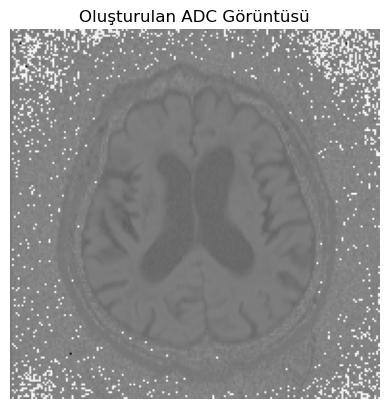

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Girdi yolları
s0_path = '../50142698.0.37_Subakut.png'  # b=0 olan görüntü
sb_path = '../50142698.0.13_Subakut.png'  # b=100 olan görüntü

# b değeri
b_value = 300

# Görüntüleri gri tonlamada oku
S0 = cv2.imread(s0_path, cv2.IMREAD_GRAYSCALE).astype(np.float32)
Sb = cv2.imread(sb_path, cv2.IMREAD_GRAYSCALE).astype(np.float32)

# Sayısal kararsızlıkları önlemek için küçük bir sabit ekleyelim (bölmede sıfırdan kaçınmak için)
epsilon = 1e-6

# ADC hesaplama
adc = -1 / b_value * np.log((Sb + epsilon) / (S0 + epsilon))

# Negatif ve NaN değerleri sıfırla
adc = np.nan_to_num(adc, nan=0.0, neginf=0.0, posinf=0.0)

# Normalizasyon (0-255 aralığına)
adc_normalized = cv2.normalize(adc, None, 0, 255, cv2.NORM_MINMAX)
adc_normalized = adc_normalized.astype(np.uint8)

# Kaydet
output_path = 'adc_olusturulmus.png'
cv2.imwrite(output_path, adc_normalized)

# İsteğe bağlı: Görselleştir
plt.imshow(adc_normalized, cmap='gray')
plt.title("Oluşturulan ADC Görüntüsü")
plt.axis('off')
plt.show()
